# GCI

## Análise Univariada

A estatística descritiva permite a sumarização e a representação gráfica de um conjunto de dados. A natureza descritiva das informações resultantes permite que um analista descreva uma amostra da população do conjunto de dados. (Observe que isso não nos permite generalizar uma população inteira ou inferir atributos ou propriedades da população.)


- Tendência central (média): média, mediana ou moda para explicar as médias de um ponto de dados
- Dispersão: intervalo e desvio padrão para descrever a distância da média ou distância entre os valores de dados mais altos e mais baixos
- Skewness (distorção): descreve a natureza simétrica ou assimétrica do conjunto de dados
- Correlação: explora as relações entre as variáveis no conjunto de dados de amostra


Carregando as bibliotecas

In [23]:
# -*- coding: utf-8 -*-
"""
Created on Sun Aug 30 13:51:26 2015

@author: ldierker
"""

import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt

Carregando o dataset

In [24]:
data = pandas.read_csv('./datasets/nesarc_pds.csv', low_memory=False)

Configurando as colunas do CSV

Convertendo os campos String em tipos numéricos

In [4]:
#Set PANDAS to show all columns in DataFrame
pandas.set_option('display.max_columns', None)
#Set PANDAS to show all rows in DataFrame
pandas.set_option('display.max_rows', None)

# bug fix for display formats to avoid run time errors
pandas.set_option('display.float_format', lambda x:'%f'%x)

#setting variables you will be working with to numeric
data['S3AQ3C1'] = pandas.to_numeric(data['S3AQ3C1'], errors='coerce')
data['TAB12MDX'] = pandas.to_numeric(data['TAB12MDX'], errors='coerce')
data['CHECK321'] = pandas.to_numeric(data['CHECK321'], errors='coerce')
data['S3AQ3B1'] = pandas.to_numeric(data['S3AQ3B1'], errors='coerce')
data['S3AQ3C1'] = pandas.to_numeric(data['S3AQ3C1'], errors='coerce')
data['AGE'] = pandas.to_numeric(data['AGE'], errors='coerce')


Filtrando o Dataset; 

gerando um subconjunto sub1

gerando uma cópia do sub1 para evitar problemas...

In [5]:
#subset data to young adults age 18 to 25 who have smoked in the past 12 months
sub1=data[(data['AGE']>=18) & (data['AGE']<=25) & (data['CHECK321']==1)]

#make a copy of my new subsetted data
sub2 = sub1.copy()

Tratando dados faltantes

In [6]:

#SETTING MISSING DATA
# recode missing values to python missing (NaN)
sub2['S3AQ3B1']=sub2['S3AQ3B1'].replace(9, numpy.nan)
# recode missing values to python missing (NaN)
sub2['S3AQ3C1']=sub2['S3AQ3C1'].replace(99, numpy.nan)

Codificando categorias a partir dos valores

In [7]:
recode1 = {1: 6, 2: 5, 3: 4, 4: 3, 5: 2, 6: 1}
sub2['USFREQ']= sub2['S3AQ3B1'].map(recode1)

recode2 = {1: 30, 2: 22, 3: 14, 4: 5, 5: 2.5, 6: 1}
sub2['USFREQMO']= sub2['S3AQ3B1'].map(recode2)

# A secondary variable multiplying the number of days smoked/month and the approx number of cig smoked/day
sub2['NUMCIGMO_EST']=sub2['USFREQMO'] * sub2['S3AQ3C1']

#univariate bar graph for categorical variables
# First hange format from numeric to categorical
sub2["TAB12MDX"] = sub2["TAB12MDX"].astype('category')

Plotando o gráfico "Dependencia de nicotina nos ults 12 meses x Dependencia entre jovens"


Text(0.5, 1.0, 'Estimated Number of Cigarettes per Month among Young Adult Smokers in the NESARC Study')

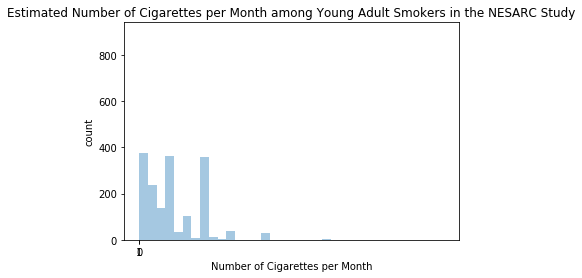

In [8]:
seaborn.countplot(x="TAB12MDX", data=sub2)
plt.xlabel('Nicotine Dependence past 12 months')
plt.title('Nicotine Dependence in the Past 12 Months Among Young Adult Smokers in the NESARC Study')

#Univariate histogram for quantitative variable:
seaborn.distplot(sub2["NUMCIGMO_EST"].dropna(), kde=False);
plt.xlabel('Number of Cigarettes per Month')
plt.title('Estimated Number of Cigarettes per Month among Young Adult Smokers in the NESARC Study')


Estatística descritiva

In [11]:

# standard deviation and other descriptive statistics for quantitative variables
print('describe number of cigarettes smoked per month')
desc1 = sub2['NUMCIGMO_EST'].describe()
print(desc1)

c1= sub2.groupby('NUMCIGMO_EST').size()
print(c1)

print('describe nicotine dependence')
desc2 = sub2['TAB12MDX'].describe()
print(desc2)

c1= sub2.groupby('TAB12MDX').size()
print(c1)

print('mode')
mode1 = sub2['TAB12MDX'].mode()
print(mode1)

print('mean')
mean1 = sub2['NUMCIGMO_EST'].mean()
print(mean1)

print('std')
std1 = sub2['NUMCIGMO_EST'].std()
print(std1)

print('min')
min1 = sub2['NUMCIGMO_EST'].min()
print(min1)

print('max')
max1 = sub2['NUMCIGMO_EST'].max()
print(max1)

print('median')
median1 = sub2['NUMCIGMO_EST'].median()
print(median1)

print('mode')
mode1 = sub2['NUMCIGMO_EST'].mode()
print(mode1)


c1= sub2.groupby('TAB12MDX').size()
print(c1)

p1 = sub2.groupby('TAB12MDX').size() * 100 / len(data)
print(p1)


c2 = sub2.groupby('NUMCIGMO_EST').size()
print(c2)

p2 = sub2.groupby('NUMCIGMO_EST').size() * 100 / len(data)
print(p2)






describe number of cigarettes smoked per month
count   1697.000000
mean     320.304361
std      274.436777
min        1.000000
25%       90.000000
50%      300.000000
75%      600.000000
max     2940.000000
Name: NUMCIGMO_EST, dtype: float64
NUMCIGMO_EST
1.000000        29
2.000000        14
2.500000        11
3.000000        12
4.000000         2
5.000000        34
6.000000         1
7.500000        12
8.000000         1
10.000000       38
12.500000        9
14.000000        3
15.000000       14
17.500000        1
20.000000       13
22.000000        4
24.000000        1
25.000000       14
28.000000       17
30.000000       25
35.000000        2
42.000000       19
44.000000        9
50.000000        7
56.000000       15
60.000000       28
66.000000       14
70.000000       22
84.000000        3
88.000000        6
90.000000       45
98.000000        1
100.000000       5
110.000000      11
120.000000      46
132.000000       4
140.000000      10
150.000000     108
154.000000       3
176.

PACKSPERMONTH
0.050000       29
0.100000       14
0.125000       11
0.150000       12
0.200000        2
0.250000       34
0.300000        1
0.375000       12
0.400000        1
0.500000       38
0.625000        9
0.700000        3
0.750000       14
0.875000        1
1.000000       13
1.100000        4
1.200000        1
1.250000       14
1.400000       17
1.500000       25
1.750000        2
2.100000       19
2.200000        9
2.500000        7
2.800000       15
3.000000       28
3.300000       14
3.500000       22
4.200000        3
4.400000        6
4.500000       45
4.900000        1
5.000000        5
5.500000       11
6.000000       46
6.600000        4
7.000000       10
7.500000      108
7.700000        3
8.800000        3
9.000000       47
10.500000      39
11.000000      12
12.000000      36
13.500000       6
14.000000       1
15.000000     350
16.500000       4
18.000000      25
19.500000       7
21.000000       2
22.500000      97
24.000000       5
25.500000       2
27.000000     

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


SMOKEGRP
1    896
2    521
3    289
dtype: int64
DAILY
0     386
1    1320
dtype: int64
counts for S3AQ3C1 with 99 set to NAN and number of missing requested
NaN            9
15.000000     99
98.000000      1
9.000000       6
20.000000    365
30.000000     38
19.000000      1
17.000000      2
80.000000      1
24.000000      1
11.000000      3
28.000000      1
35.000000      1
16.000000      5
60.000000      2
6.000000      60
10.000000    387
3.000000     114
40.000000     30
12.000000     25
8.000000      42
13.000000      7
25.000000     13
2.000000     111
7.000000      45
27.000000      1
18.000000      3
5.000000     163
1.000000      83
14.000000      3
4.000000      84
Name: S3AQ3C1, dtype: int64
counts for TAB12MDX - past 12 month nicotine dependence
0    810
1    896
Name: TAB12MDX, dtype: int64


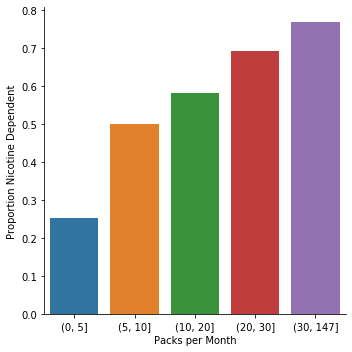

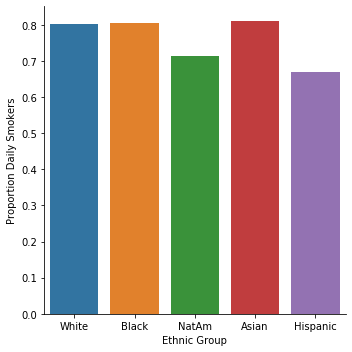

In [14]:
# A secondary variable multiplying the number of days smoked per month and the approx number of cig smoked per day
sub2['PACKSPERMONTH']=sub2['NUMCIGMO_EST'] / 20

c2= sub2.groupby('PACKSPERMONTH').size()
print(c2)

sub2['PACKCATEGORY'] = pandas.cut(sub2.PACKSPERMONTH, [0, 5, 10, 20, 30, 147])

# change format from numeric to categorical
sub2['PACKCATEGORY'] = sub2['PACKCATEGORY'].astype('category')

print( 'describe PACKCATEGORY')
desc3 = sub2['PACKCATEGORY'].describe()
print( desc3)

print( 'pack category counts')
c7 = sub2['PACKCATEGORY'].value_counts(sort=False, dropna=True)
print(c7)

sub2['TAB12MDX'] = pandas.to_numeric(sub2['TAB12MDX'], errors='coerce')

# bivariate bar graph C->Q
seaborn.factorplot(x="PACKCATEGORY", y="TAB12MDX", data=sub2, kind="bar", ci=None)
plt.xlabel('Packs per Month')
plt.ylabel('Proportion Nicotine Dependent')

#creating 3 level smokegroup variable
def SMOKEGRP (row):
   if row['TAB12MDX'] == 1 :
      return 1
   elif row['USFREQMO'] == 30 :
      return 2
   else :
      return 3
         
sub2['SMOKEGRP'] = sub2.apply (lambda row: SMOKEGRP (row),axis=1)

c3= sub2.groupby('SMOKEGRP').size()
print(c3)

#creating daily smoking vairable
def DAILY (row):
   if row['USFREQMO'] == 30 :
      return 1
   elif row['USFREQMO'] != 30 :
      return 0
      
sub2['DAILY'] = sub2.apply (lambda row: DAILY (row),axis=1)
      
c4= sub2.groupby('DAILY').size()
print( c4)

# you can rename categorical variable values for graphing if original values are not informative 
# first change the variable format to categorical if you haven’t already done so
sub2['ETHRACE2A'] = sub2['ETHRACE2A'].astype('category')
# second create a new variable (PACKCAT) that has the new variable value labels
sub2['ETHRACE2A']=sub2['ETHRACE2A'].cat.rename_categories(["White", "Black", "NatAm", "Asian", "Hispanic"])

# bivariate bar graph C->C
seaborn.factorplot(x='ETHRACE2A', y='DAILY', data=sub2, kind="bar", ci=None)
plt.xlabel('Ethnic Group')
plt.ylabel('Proportion Daily Smokers')

#check to see if missing data were set to NaN 
print( 'counts for S3AQ3C1 with 99 set to NAN and number of missing requested')
c4 = sub2['S3AQ3C1'].value_counts(sort=False, dropna=False)
print(c4)

print ('counts for TAB12MDX - past 12 month nicotine dependence')
c5 = sub2['TAB12MDX'].value_counts(sort=False)
print(c5)


count   203.000000
mean     56.769360
std      23.844933
min      10.400000
25%      36.830000
50%      57.940000
75%      74.210000
max     100.000000
Name: urbanrate, dtype: float64
count   192.000000
mean     35.632716
std      27.780285
min       0.210066
25%       9.999604
50%      31.810121
75%      56.416046
max      95.638113
Name: internetuserate, dtype: float64
Income per person - 4 categories - quartiles
1=25th%tile    48
2=50%tile      47
3=75%tile      47
4=100%tile     48
Name: INCOMEGRP4, dtype: int64
INCOMEGRP4
1=25th%tile    48
2=50%tile      47
3=75%tile      47
4=100%tile     48
dtype: int64


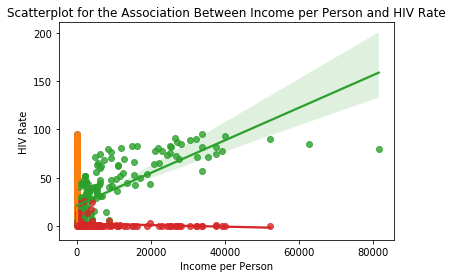

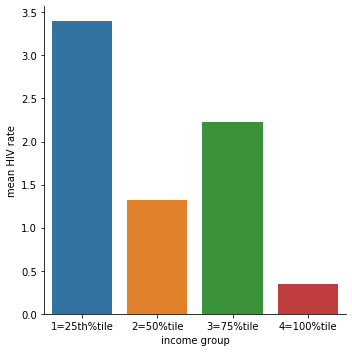

In [22]:
#GAPMINDER

import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt

# any additional libraries would be imported here
data = pandas.read_csv('./datasets/gapminder.csv', low_memory=False)

#setting variables you will be working with to numeric
data['internetuserate'] = pandas.to_numeric(data['internetuserate'], errors='coerce')
data['urbanrate'] = pandas.to_numeric(data['urbanrate'], errors='coerce')
data['incomeperperson'] = pandas.to_numeric(data['incomeperperson'], errors='coerce')
data['hivrate'] = pandas.to_numeric(data['hivrate'], errors='coerce')

data['incomeperperson']=data['incomeperperson'].replace(' ', numpy.nan)

desc1 = data['urbanrate'].describe()
print (desc1)

desc2 = data['internetuserate'].describe()
print (desc2)

#basic scatterplot:  Q->Q
scat1 = seaborn.regplot(x="urbanrate", y="internetuserate", fit_reg=False, data=data)
plt.xlabel('Urban Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Urban Rate and Internet Use Rate')

scat2 = seaborn.regplot(x="urbanrate", y="internetuserate", data=data)
plt.xlabel('Urban Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Urban Rate and Internet Use Rate')

scat3 = seaborn.regplot(x="incomeperperson", y="internetuserate", data=data)
plt.xlabel('Income per Person')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Income per Person and Internet Use Rate')

scat4 = seaborn.regplot(x="incomeperperson", y="hivrate", data=data)
plt.xlabel('Income per Person')
plt.ylabel('HIV Rate')
plt.title('Scatterplot for the Association Between Income per Person and HIV Rate')

# quartile split (use qcut function & ask for 4 groups - gives you quartile split)
print ('Income per person - 4 categories - quartiles')
data['INCOMEGRP4']=pandas.qcut(data.incomeperperson, 4, labels=["1=25th%tile","2=50%tile","3=75%tile","4=100%tile"])
c10 = data['INCOMEGRP4'].value_counts(sort=False, dropna=True)
print(c10)

# bivariate bar graph C->Q
#seaborn.factorplot(x='INCOMEGRP4', y='hivrate', data=data, kind="bar", ci=None)
seaborn.catplot(x='INCOMEGRP4', y='hivrate', data=data, kind="bar", ci=None)
plt.xlabel('income group')
plt.ylabel('mean HIV rate')


c11= data.groupby('INCOMEGRP4').size()
print(c11)

#result = data.sort(['INCOMEGRP4'], ascending=[1])
result = data['INCOMEGRP4']#), ascending=[1])
#print(result)